In [2]:
"""
Michael Murray 2019 RSSAS
Pig Teeth Stats
6/12/2019
"""
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [3]:
"""there are three meso sites, Can assume they are from the same pop?"""
Sludegaard = [18.0,17.0,16.6,15.7,18.0,17.2,15.5,15.9,16.2,15.6]
Bloksbjerg = [17.5,18.3,16.9,16.8,18.2,14.6,14.5,16.7,17.3]
Nivaa = [17.0,18.6,17.3,16.5]

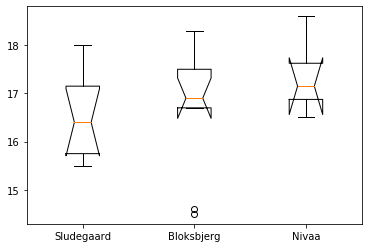

"There's a fair amount of overlap"

In [4]:
boxplotdata = [Sludegaard, Bloksbjerg, Nivaa]
plt.boxplot(boxplotdata,notch = True , labels=['Sludegaard','Bloksbjerg','Nivaa'])
plt.show()

"""There's a fair amount of overlap"""

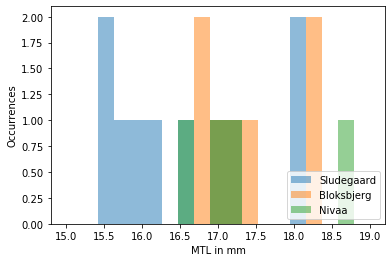

In [5]:
bins = np.linspace(15, 19, 20)

plt.hist(Sludegaard, bins, alpha=0.5, label='Sludegaard')
plt.hist(Bloksbjerg, bins, alpha=0.5, label='Bloksbjerg')
plt.hist(Nivaa, bins, alpha=0.5, label='Nivaa')

plt.legend(loc='lower right')
plt.xlabel('MTL in mm')
plt.ylabel('Occurrences')

plt.show()

In [6]:
"""Testing the Mesolithics
first normality 
we're using sapiro since these are smaller samples baring chi^2 and shapiro is unconstrained by sample size"""

print("Sludegaard")
print(scs.shapiro(Sludegaard))
print()
print("Bloksbjerg")
print(scs.shapiro(Bloksbjerg))
print()
print("Nivaa")
print(scs.shapiro(Nivaa))
print()
print("Can not reject null hypothosis of normality for any of these samples")

Sludegaard
(0.8975198268890381, 0.20573464035987854)

Bloksbjerg
(0.8642817139625549, 0.10670509189367294)

Nivaa
(0.9251095652580261, 0.5659627914428711)

Can not reject null hypothosis of normality for any of these samples


In [7]:
"""having checked for abnormality we now can test for equal mean.
since here we believe these samples to have been taken from the same population 
we are using a standard students T test (no concern of different variations)
we'll do a round robin"""

print("Sludegaard & Nivaa")
print(scs.ttest_ind(Sludegaard, Nivaa, equal_var=True))
print()
print("Bloksbjerg & Sludegaard")
print(scs.ttest_ind(Bloksbjerg, Sludegaard, equal_var=True))
print()
print("Nivaa & Bloksbjerg")
print(scs.ttest_ind(Nivaa, Bloksbjerg, equal_var=True))
print()
print("Can not reject null equal mean of normality for any of these samples")

Sludegaard & Nivaa
Ttest_indResult(statistic=-1.4087346130859575, pvalue=0.18429440175984865)

Bloksbjerg & Sludegaard
Ttest_indResult(statistic=0.3458246750755544, pvalue=0.7337171816404795)

Nivaa & Bloksbjerg
Ttest_indResult(statistic=0.7844489687048012, pvalue=0.44934034588334915)

Can not reject null equal mean of normality for any of these samples


In [8]:
"""so we can't prove they don't share a mean and we can't proove they arn't all part of the same dist.
do we need to show that we can't prove they arn't part of the same dist? possibly excessive"""

kStatA,KpA = scs.ks_2samp(Sludegaard, Nivaa)
print("Sludegaard & Nivaa")
print(kStatA)
print(KpA)
print()

kStatB,KpB = scs.ks_2samp(Bloksbjerg, Sludegaard)
print("Bloksbjerg & Sludegaard")
print(kStatB)
print(KpB)
print()

kStatC,KpC = scs.ks_2samp(Nivaa, Bloksbjerg)
print("Nivaa & Bloksbjerg")
print(kStatC)
print(KpC)

print("In a round robin of KS test we have failed to prove")
print("that these samples are not part of the same distribution")

Sludegaard & Nivaa
0.5
0.4095904095904096

Bloksbjerg & Sludegaard
0.37777777777777777
0.3925826495485938

Nivaa & Bloksbjerg
0.3055555555555556
0.8867132867132868
In a round robin of KS test we have failed to prove
that these samples are not part of the same distribution


We can not say that these samples all represnt the same population of pigs
that being said having failed to prove that they are different we shall not merge them into
a combined mesolithic populaiton to compare with out neolithic population


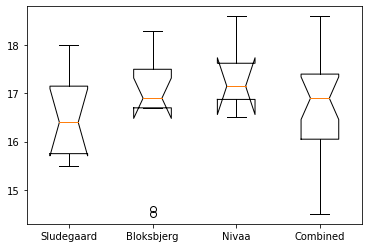

In [9]:
mesoLith = Sludegaard+Bloksbjerg+Nivaa
print("We can not say that these samples all represnt the same population of pigs")
print("that being said having failed to prove that they are different we shall not merge them into")
print("a combined mesolithic populaiton to compare with out neolithic population")
boxplotdata = [Sludegaard, Bloksbjerg, Nivaa, mesoLith]
plt.boxplot(boxplotdata,notch = True , labels=['Sludegaard','Bloksbjerg','Nivaa','Combined'])
plt.show()

In [10]:
"""Combinding the mesolithic site for comparison with the Neolithic"""
neoLith = [13.0,13.2,13.2,13.3,13.5,13.5,13.6,13.6,13.6,13.7,13.8,13.8,13.9,13.9,13.9,13.9,14.0,14.0,14.0,14.0,14.1,14.1,14.2,14.2,14.2,14.2,14.2,14.2,14.2,14.3,14.3,14.4,14.5,14.6,14.6,14.6,14.7,14.9,15.0,15.0,15.1,15.1,15.2,15.3,15.4,15.6,16.1]

neo = pd.DataFrame(neoLith)
meso = pd.DataFrame(mesoLith)

In [11]:
"""Summary Statistics"""

print("Neolithic Summary Stats:")
print(neo.describe())

print()

print("Mesolithic Summary Stats:")
print(meso.describe())

Neolithic Summary Stats:
               0
count  47.000000
mean   14.248936
std     0.672398
min    13.000000
25%    13.850000
50%    14.200000
75%    14.600000
max    16.100000

Mesolithic Summary Stats:
               0
count  23.000000
mean   16.778261
std     1.114759
min    14.500000
25%    16.050000
50%    16.900000
75%    17.400000
max    18.600000


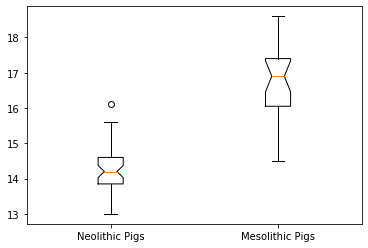

In [12]:
"""BoxPlot"""

boxplotdata = [neoLith, mesoLith]
plt.boxplot(boxplotdata,notch = True , labels=['Neolithic Pigs','Mesolithic Pigs'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

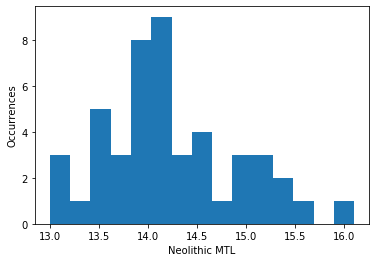

In [13]:
plt.hist(neoLith, 15)
plt.xlabel('Neolithic MTL')
plt.ylabel('Occurrences')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

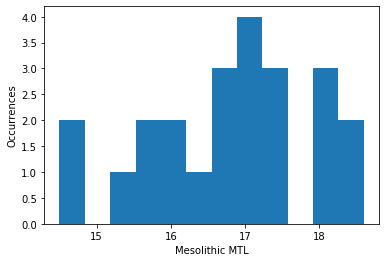

In [14]:
plt.hist(mesoLith, 12)
plt.xlabel('Mesolithic MTL')
plt.ylabel('Occurrences')
plt.show

In [15]:
"""Test for Normality in our distributions
    Returns
    
        statisticfloat or array
    
            s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.
        pvaluefloat or array
    
            A 2-sided chi squared probability for the hypothesis test.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
"""

print("Neolithic")
print(scs.normaltest(neoLith))
print("can not reject hypothosis of normality @ 23%")
print()
print("Mesolithic")
print(scs.normaltest(mesoLith))
print("can not reject hypothosis of normality @ 67%")


Neolithic
NormaltestResult(statistic=2.9444446982859604, pvalue=0.22941507784349882)
can not reject hypothosis of normality @ 23%

Mesolithic
NormaltestResult(statistic=0.788491559606371, pvalue=0.6741883339996482)
can not reject hypothosis of normality @ 67%


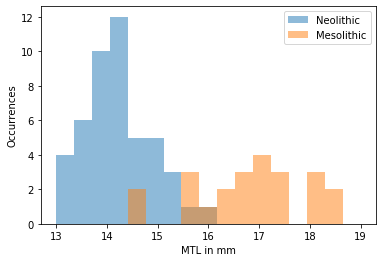

In [16]:
bins = np.linspace(13, 19, 18)

plt.hist(neoLith, bins, alpha=0.5, label='Neolithic')
plt.hist(mesoLith, bins, alpha=0.5, label='Mesolithic')
plt.legend(loc='upper right')
plt.xlabel('MTL in mm')
plt.ylabel('Occurrences')

plt.show()

In [17]:
"""Welch's T test for equal mean because equal_var=False

welches because we have significantly different stdevs
 Delacre, M., Lakens, D., & Leys, C. (2017). 
 Why Psychologists Should by Default Use Welch’s t-test Instead of Student’s t-test. 
 International Review of Social Psychology, 30(1), 92–101. DOI: http://doi.org/10.5334/irsp.82 
"""

print(scs.ttest_ind(neoLith, mesoLith, equal_var=False))

print("Extremely unlikely these sample represent populaitons of the same mean")

Ttest_indResult(statistic=-10.025528650636977, pvalue=4.195433500599192e-11)
Extremely unlikely these sample represent populaitons of the same mean


In [18]:
"""Two Sample Kolmogorov-Smirnov Test"""

kStat,Kp = scs.ks_2samp(neoLith, mesoLith)

print(kStat)
print(Kp)
print("""Extremely unlikely these samples are taken from the same distribution""")

0.8704902867715079
1.4807044479425713e-12
Extremely unlikely these samples are taken from the same distribution
